In [ ]:
from matplotlib import colors
import pandas as pd
import numpy as np
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
%matplotlib inline

# Read data
Mydata = pd.read_excel('/data.xlsx',
                     skiprows=0,
                     usecols='A:E')

# Create pairwise distance matrix
Out = squareform(pdist(np.sqrt(Mydata)))/np.sqrt(2)

# Compute DBSCAN
db = DBSCAN(eps=0.9, min_samples=4000).fit(Out)
labels = db.labels_

no_clusters = len(np.unique(labels) )
no_noise = np.sum(np.array(labels) == -1, axis=0)

print('DBSCAN Estimated no. of clusters: %d' % no_clusters)
print('DBSCAN Estimated no. of noise points: %d' % no_noise)

# Compute KMeans
model = KMeans(n_clusters=5)
model.fit(Out)

f, (ax1) = plt.subplots(1, sharey=True,figsize=(10,6))
ax1.set_title('Визуализация KMeans')
ax1.scatter(Out[0], Out[1],c=model.labels_)
kmeans_labels=model.labels_

print('KMeans Estimated no. of clusters: %d' % model.n_clusters)
#print(kmeans_labels)

# Compute TSNE
Out_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(Out)
f, (ax2) = plt.subplots(1, sharey=True,figsize=(10,6))
ax2.set_title('Визуализация TSNE')
sc = ax2.scatter(Out_embedded[:,0], Out_embedded[:,1])




/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[4 0 2 8 4 1 8 0 6 9 4 6 1 7 0 8 7 6 7 2 8 3 9 9 3 0 0 8 9 3 1 1 1 8 4 0 8
 1 2 0 2 8 2 2 1 4 4 4 2 2 0 0 1 3 0 8 8 5 8 2 2 4 8 0 2 8 5 8 8 1 0 7 1 4
 3 1 0 8 4 9 4 0 8 2 7 5 2 5 6 7 2 2 6 7 9 8 4 8 3 6 8 5 7 1 1 1 0 9 8 4 9
 1 2 4 1 4 2 2 7 8 2 4 1 6 0 8 3 0 0 2 0 0 8 0 8 4 0 1 1 6 6 2 0 3 0 1 2 8
 4 9 3 4 3 0 9 9 4 6 2 8 8 9 1 4 4 0 8 2 3 1 3 8 5 4 9 9 3 0 1 0 4 9 6 4 3
 8 4 2 9 4 3 8 6 0 9 1 3 0 0 1]


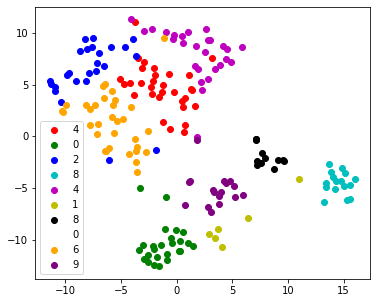

In [59]:
from matplotlib import colors
import pandas as pd
import numpy as np

# Read data
Mydata = pd.read_excel('/data.xlsx',
                     skiprows=0,
                     usecols='A:E')

# Create pairwise distance matrix
Out = squareform(pdist(np.sqrt(Mydata)))/np.sqrt(2)

from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN
tsne = TSNE(n_components=2, random_state=0)
kmns = KMeans(n_clusters=10).fit(Out)

X_2d = tsne.fit_transform(Out)
y=kmns.labels_
print(y)

target_ids = range(len(y))

from matplotlib import pyplot as plt
plt.figure(figsize=(6, 5))
colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'w', 'orange', 'purple'
for i, c, label in zip(target_ids, colors, y):
    plt.scatter(X_2d[y == i, 0], X_2d[y == i, 1], c=c, label=label)
plt.legend()
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


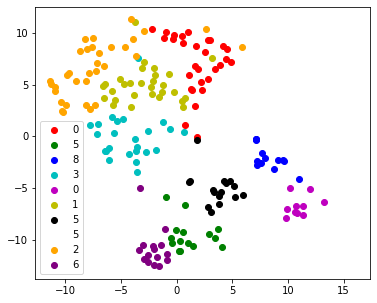

In [82]:
import pandas as pd

url = 'https://raw.githubusercontent.com/ISwifton/Clustering-of-sociological-data/main/data.csv'
#mydata=pd.read_csv(url, delimiter=",", names=['col1','col2','col3','col4','col5'])
mydata=pd.read_csv(url)
#print(mydata)

# Create pairwise distance matrix
Out = squareform(pdist(np.sqrt(Mydata)))/np.sqrt(2)

from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN
tsne = TSNE(n_components=2, random_state=0)
kmns = KMeans(n_clusters=10).fit(Out)

X_2d = tsne.fit_transform(Out)
y=kmns.labels_
#print(y)

target_ids = range(len(y))

from matplotlib import pyplot as plt
plt.figure(figsize=(6, 5))
colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'w', 'orange', 'purple'
for i, c, label in zip(target_ids, colors, y):
    plt.scatter(X_2d[y == i, 0], X_2d[y == i, 1], c=c, label=label)
plt.legend()
plt.show()